In [2]:
%matplotlib notebook
import sys
sys.path.append("/home/oslick/jupiter/")
import read_csv
import myfunctions8 as mf8
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [3]:
en=100
N=100000

In [9]:
#prob={}
#filename='counts_'+str(en)+'keV.csv'
#counts=read_csv.read_csv_n(filename, n=[0,1], formats=['i', 'i'])
#energy=[[x[0], x[1]/60] for x in counts]
#np.save('energy_100keV', energy)
#####choose events with 100keV deposited:
#events_100={x[0]:x[0] for x in energy if (x[1] >= 95 and x[1]<105)}
#prob['photopeak_efficiency']=np.round(len(events_100)/N, 2)
#------------ group interactions by event_ID ------------
#filename2='./pr_int_'+str(en)+'keV.csv'
#all_int=read_csv.read_csv_n(filename2,[0,1,2,3], format=['i', 'i', 'f', 'i'])
#all_int_100=[x for x in all_int if (x[0] in events_100 and x[3]!=3 and x[1]==1)]
#all_int_100_gr=mf8.group(all_int_100)
#with open('all_int_100keV.json', 'w') as f:
#    json.dump(all_int_100_gr, f)
#----------------choose all photoelectric interactions if all the energy deposited only:
#a=all_int_100_gr
#all_int_100_gr_ph=[[a[x][0][0], a[x][0][2]+5.0] for x in a if a[x][0][3]==2] 
#prob['whole_energy_one_interaction']=np.round(len(all_int_100_gr_ph)/N, 2)
#with open('prob.json', 'w') as f:
#    json.dump(prob, f)
## ------------------------------Group the events by depth of interaction: [depth+5mm, ev_ID]
#events_group={}
#depths_group={}
#for i in range(10):
#    events_group[i]=[]
#    depths_group[i]=[]
#for j in all_int_100_gr_ph:
#    events_group[math.ceil(j[1]-1)].append(int(j[0]))
#    depths_group[math.ceil(j[1]-1)].append(j[1])
#with open('events_group_100keV.json', 'w') as f:
#    json.dump(events_group, f)
#with open('depths_group_100keV.json', 'w') as f:
#    json.dump(depths_group, f)

In [4]:
#----load files
with open('prob.json') as f:
    prob = json.load(f)
energy=np.load('energy_100keV.npy')
with open('all_int_100keV.json') as f:
    a = json.load(f)
with open('events_group_100keV.json') as f:
    events_group = json.load(f)
with open('depths_group_100keV.json') as f:
    depths_group = json.load(f)

Energy deposited in scintillator:

In [5]:
events_100={x[0]:x[0] for x in energy if (x[1] >= 95 and x[1]<105)}
print('photopeak efficiency: '+ str(prob['photopeak_efficiency']))

photopeak efficiency: 0.93


<IPython.core.display.Javascript object>


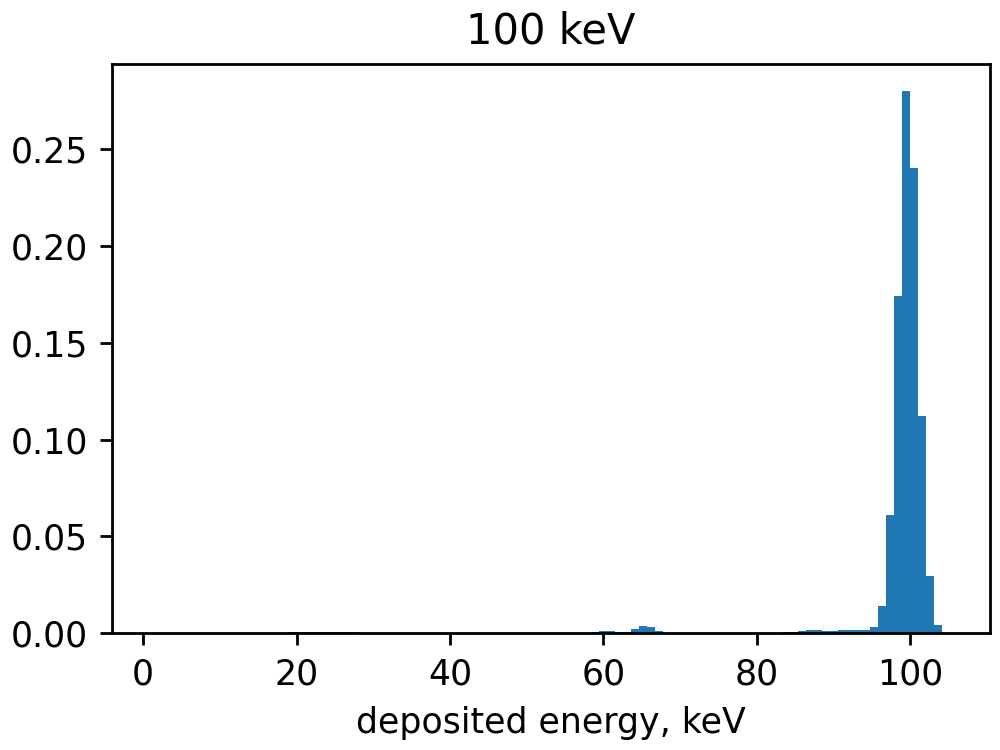

In [6]:
only_energy=[x[1] for x in energy]
fig, ax = plt.subplots(figsize=(4,3), constrained_layout=True)
plt.hist(only_energy,100, density=1)
plt.title(str(en)+' keV')
ax.set(xlabel='deposited energy, keV')
plt.show()
#plt.savefig('dep_en_'+str(en)+'kev.pdf', format='pdf')

Number of interaction if the whole energy was deposited

[9.05359044e-01 8.89517439e-02 5.49562823e-03 1.82829119e-04
 1.07546541e-05]


<IPython.core.display.Javascript object>


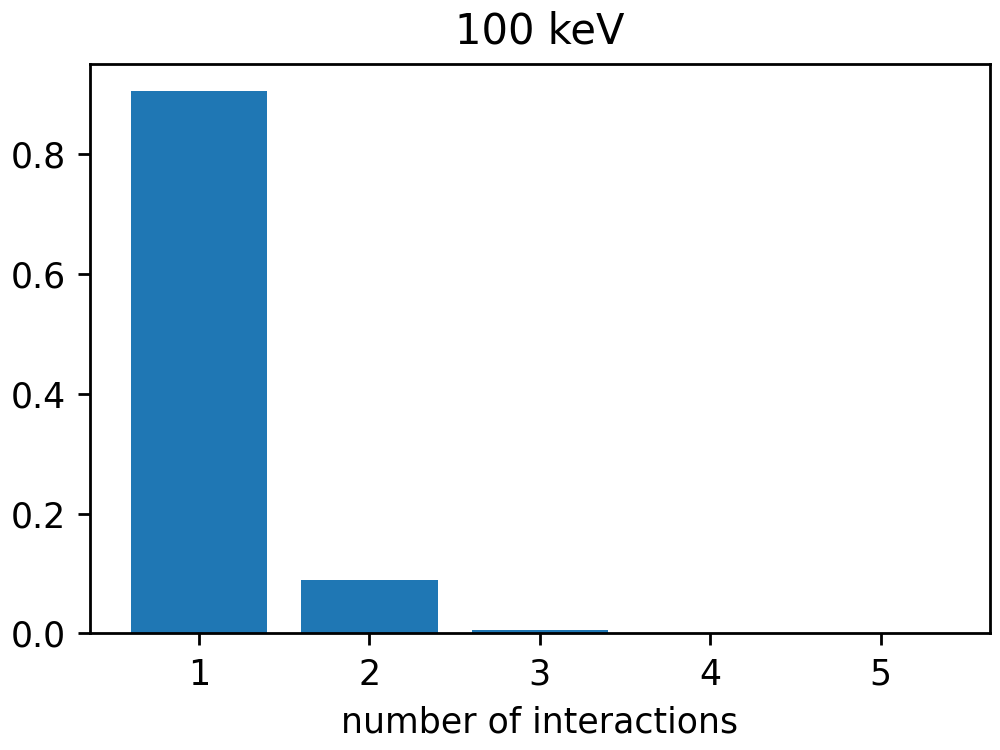

In [10]:
inter=[len(a[x]) for x in a]
inter_group=[]
for j in range(1,max(inter)+1):
    inter_group.append(len([x for x in inter if x==j]))
print(np.array(inter_group)/sum(inter_group))
fig, ax = plt.subplots(figsize=(4,3), constrained_layout=True)
plt.title(str(en)+' keV')
bins=range(1,max(inter)+1)
plt.bar(bins[:],np.array(inter_group)/sum(inter_group))
ax.set(xlabel='number of interactions')
ax.set(xticks=[1,2,3,4,5])
plt.show()
#plt.savefig('num_int_'+str(en)+'kev.pdf', format='pdf')

In [7]:
print('the whole energy deposited in one interaction: '+ str(prob['whole_energy_one_interaction']))

the whole energy deposited in one interaction: 0.84


Distribution of the depth of the interaction if the whole energy (100keV) was deposited in one interaction:

[39772, 21463, 11211, 5861, 2970, 1433, 762, 406, 203, 102] 10


<IPython.core.display.Javascript object>


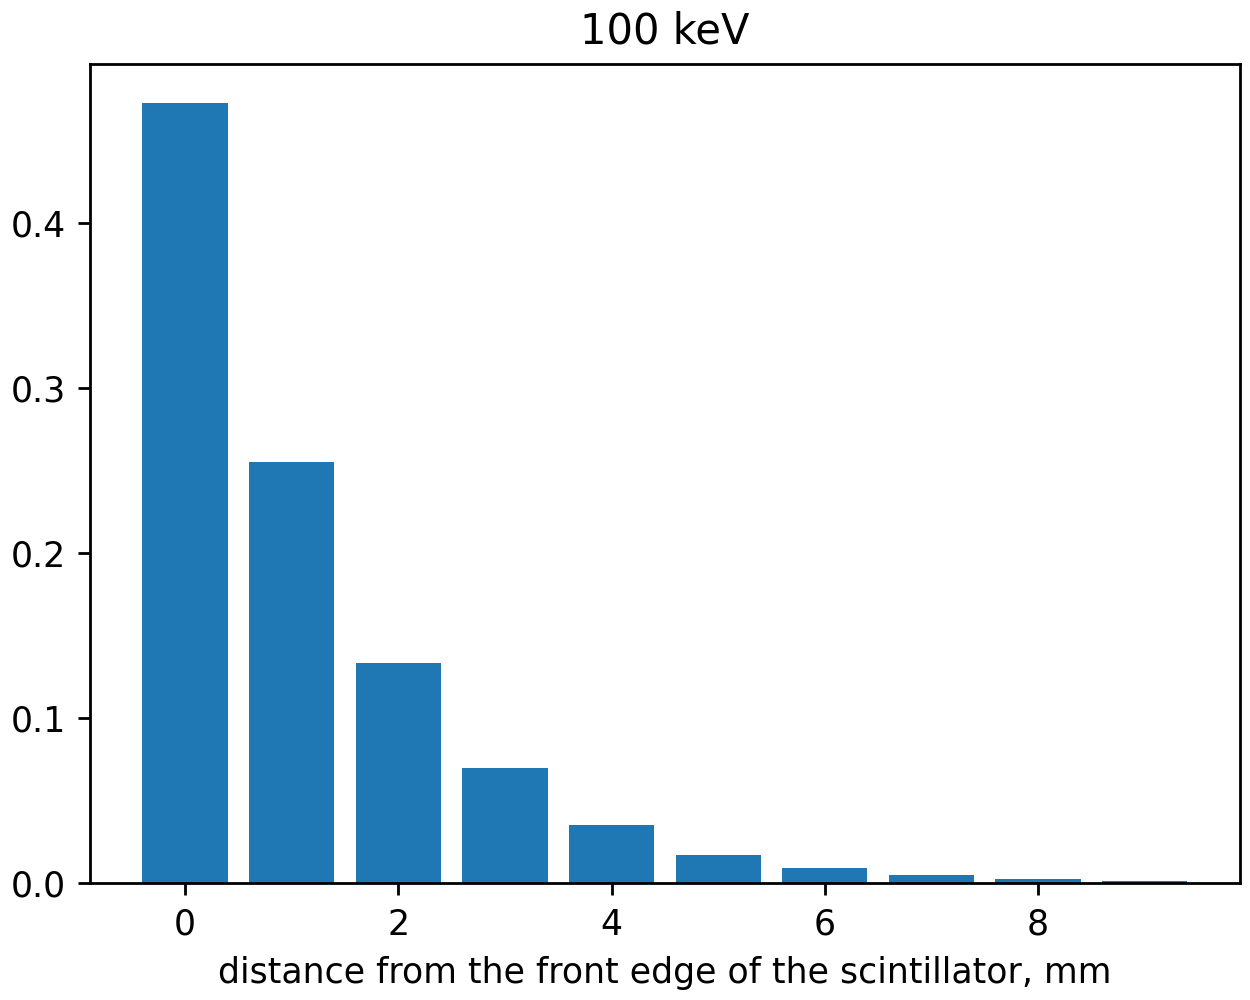

In [8]:
num_depth=[len(events_group[i]) for i in events_group]
print(num_depth, len(num_depth))
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
plt.title(str(en)+' keV')
bins=range(0,10)
plt.bar(bins[:],np.array(num_depth)/sum(num_depth))
ax.set(xlabel='distance from the front edge of the scintillator, mm')
plt.show()
#plt.savefig('num_depth_'+str(en)+'kev.pdf', format='pdf')